In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, e
import random
import numpy

In [2]:
df = pd.read_csv("./full_wage.csv")
df.head()

,Unnamed: 0,id_w,age,changed,husband_yes_or_not,wage_of_partner,full_wage,y17,k31_3,k31_4,...,m2_1_4,y10_1,y10_2,y10_3,y5_2,y5_3,y5_4,y8_2,y8_3,y8_4
0,0,2020.0,29.0,0.0,1.0,10.174468,10.867616,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,2020.0,38.0,0.0,0.0,0.000000,10.356790,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,2020.0,42.0,0.0,0.0,0.000000,11.484961,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,2020.0,19.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,2020.0,27.0,0.0,0.0,0.000000,9.951325,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
VAR = 'full_wage'

In [4]:
rg = smf.logit(f"poyavlenie_child ~ {VAR}", data=df).fit()
rg.summary2()

Optimization terminated successfully.
         Current function value: 0.196390
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: poyavlenie_child Pseudo R-squared: 0.000    
Date:               2024-05-04 16:37 AIC:              4609.7401
No. Observations:   11726            BIC:              4624.4792
Df Model:           1                Log-Likelihood:   -2302.9  
Df Residuals:       11724            LL-Null:          -2303.3  
Converged:          1.0000           LLR p-value:      0.36012  
No. Iterations:     7.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept   -3.0493    0.1087  -28.0645  0.0000  -3.2622  -2.8363
full_wage    0.0105    0.0116    0.9058  0.3651  -0.0122   0.0332
================================================================

"""

In [5]:
pred = pd.DataFrame(
    {
        VAR: df[VAR],
        "pred": rg.predict(df[VAR]),
        "real": df.poyavlenie_child,
    }
)
pred['pred_p'] = 1 / (1 + e ** -pred.pred)

In [6]:
pred.pred.corr(pred.real)

0.008389250785637794

<Axes: xlabel='full_wage', ylabel='pred_p'>

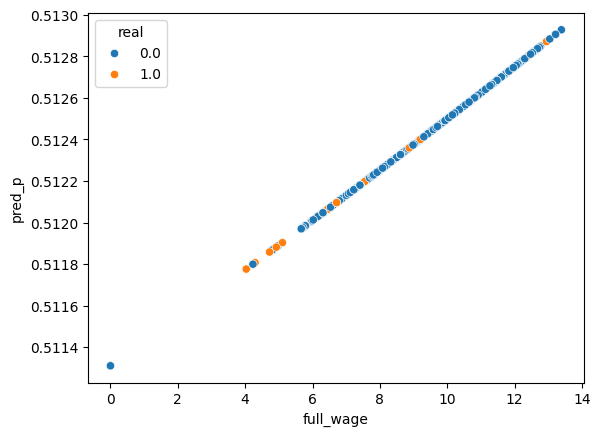

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(data=pred, x=VAR, y="pred_p", hue="real", ax=ax)

In [8]:
rg_full = smf.logit(
    "poyavlenie_child ~ age + y11_1 + y11_2 + y14_1 + y14_2 + full_wage + k31_3 + k31_6 + m4 + y5_2 + y5_3 + y5_4 + k15_1 + k15_2",
    data=df,
).fit()
rg_full.summary2()

Optimization terminated successfully.
         Current function value: 0.163036
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: poyavlenie_child Pseudo R-squared: 0.170      
Date:               2024-05-04 16:37 AIC:              3853.5181  
No. Observations:   11726            BIC:              3964.0615  
Df Model:           14               Log-Likelihood:   -1911.8    
Df Residuals:       11711            LL-Null:          -2303.3    
Converged:          1.0000           LLR p-value:      4.6423e-158
No. Iterations:     8.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      0.4623    0.3368    1.3725  0.1699  -0.1979   1.1224
age           -0.1227    0.0078  -15.8020  0.0000  -0.1379  -0.1074
y11_1         -0.7076    0.1347   -5.2550  0.0000  -0.9715  -0.4437
y11_2         -0.5559    0.1034   -5.3749  0.0000  -0.7586  -0.3532
y14_1         -0.1884    0.1263   -1.4915  0.1358  -0.4359   0.0592
y14_2         -0.3459    0.1028   -3.3659  0.0008  -0.5473  -0.1445
full_wage     -0.1016    0.0138   -7.3502  0.0000  -0.1286  -0.0745
k31_3          0.9362    0.1736    5.3933  0.0000   0.5960   1.2764
k31_6         -2.1790    0.1893  -11.5082  0.0000  -2.5502  -1.8079
m4             0.1879    0.0123   15.2142  0.0000   0.1637   0.2121
y5_2           0.0597    0.1415    0.4216  0.6733  -0.2177   0.3371
y5_3           0.4606    0.1378    3.3412  0.0008   0.1904   0.7307
y5_4          -0.2601    0.7893   -0.3295  0.7418  -1.8071   1.2869
k15_1          0.3027    0.1094    2.7667  0.0057   0.0883   0.5172
k15_2          0.1264    0.1462    0.8647  0.3872  -0.1602   0.4130
==================================================================

"""

In [9]:
rg_full = smf.logit(
    "poyavlenie_child ~ age + y11_1 + y11_2 + y14_1 + y14_2 + full_wage + k31_3 + k31_6 + m4 + y5_2 + y5_3 + y5_4 + k15_1 + k15_2",
    data=df[df.],
).fit()
rg_full.summary2()

SyntaxError: invalid syntax (225625702.py, line 3)

In [ ]:
df['prediction'] = rg_full.predict(df)

In [ ]:
df.prediction.corr(df.poyavlenie_child)

0.2478887690088532

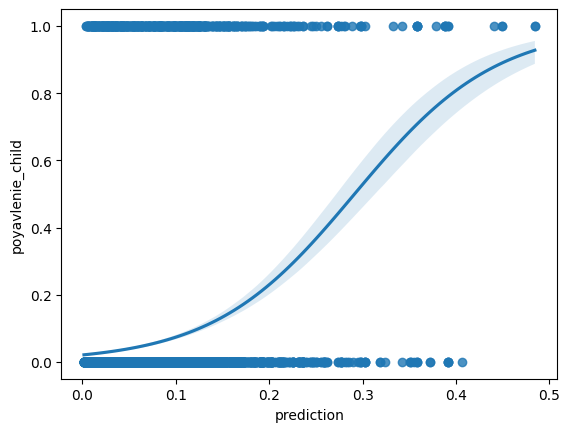

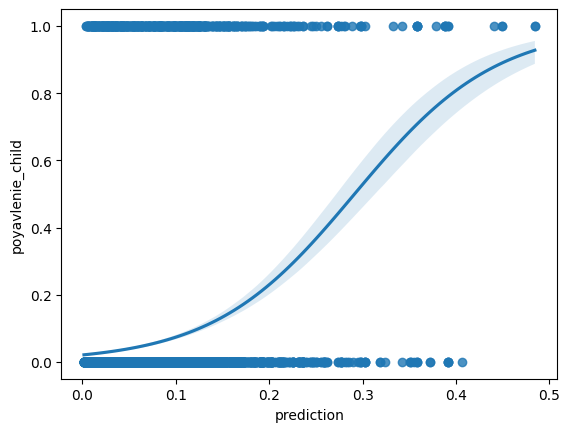

In [ ]:
fig, ax = plt.subplots()
# sns.scatterplot(data=df, x='prediction', y='poyavlenie_child', ax=ax)
sns.regplot(data=df, x='prediction', y='poyavlenie_child', logistic=True, ax=ax)
fig